# ING Lion's Den 2024 
Excersise 1: Part II - Data Visualisation and Statistical Describe 



## Team: RiskBusters


 Michał Bryzik, Michał Niegierewicz, Kacper Gruca, Jan Ślusarek

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [8]:
df = pd.read_csv('../data/output/development_sample_cleaned.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35700 entries, 0 to 35699
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   working_months  35700 non-null  float64
 1   ID              35700 non-null  int64  
 2   customer_id     35700 non-null  int64  
 3   _r_             35700 non-null  float64
 4   Var1            35700 non-null  int64  
 5   Var4            35700 non-null  int64  
 6   Var5            35700 non-null  int64  
 7   Var6            35700 non-null  int64  
 8   Var7            35700 non-null  float64
 9   Var15           35700 non-null  int64  
 10  Var16           35700 non-null  int64  
 11  Var17           35700 non-null  float64
 12  Var20           35700 non-null  int64  
 13  Var21           35700 non-null  int64  
 14  Var22           35700 non-null  int64  
 15  Var23           35700 non-null  int64  
 16  Var24           35700 non-null  int64  
 17  Var25           35700 non-null 

## Data Visualisation 

Creating histograms for both numeric and binary variables 

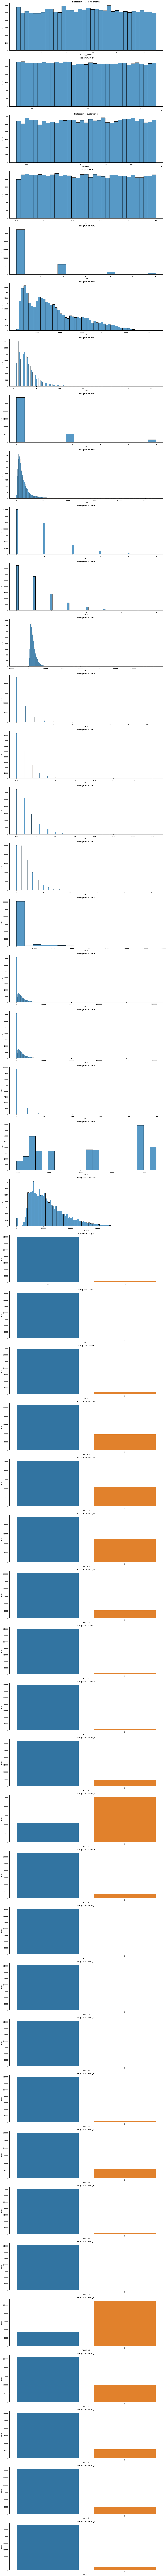

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Searching a index for 'target', because ater (including) this index we have binary variables 
# Before we have only numerical
target_index = df.columns.get_loc('target')

# Dividing numerical and binary variables based on order of df 
num_vars = df.columns[:target_index]
bin_vars = df.columns[target_index:]

# Settings for canvas
plt.figure(figsize=(15, 5 * len(df.columns)))

# Draw histograms for numeric variables
for i, var in enumerate(num_vars, 1):
    plt.subplot(len(df.columns), 1, i)
    sns.histplot(df[var], kde=False)
    plt.title(f'Histogram of {var}')

# Draw frequency histograms for binary variables 
for i, var in enumerate(bin_vars, len(num_vars) + 1):
    plt.subplot(len(df.columns), 1, i)
    sns.countplot(x=var, data=df)
    plt.title(f'Bar plot of {var}')

plt.tight_layout()
plt.show()



Creating boxplots for numeric variables

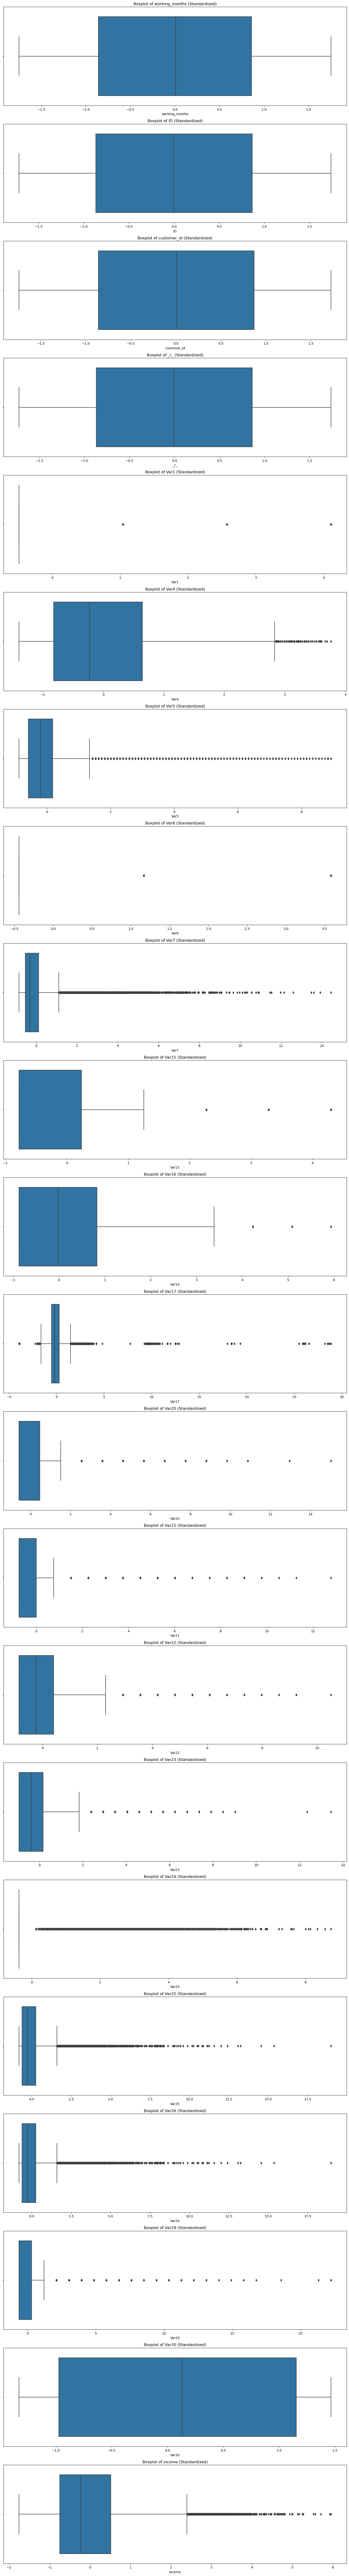

In [16]:
# Standardize the numerical variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_vars]), columns=num_vars)

# Setting the canvas for plots
plt.figure(figsize=(15, 5 * len(num_vars)))

# Drawing boxplots for standardized numerical variables
for i, var in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 1, i)  
    sns.boxplot(x=df_scaled[var])
    plt.title(f'Boxplot of {var} (Standardized)')

plt.tight_layout()
plt.show()

Creating violin plots for numeric variables 

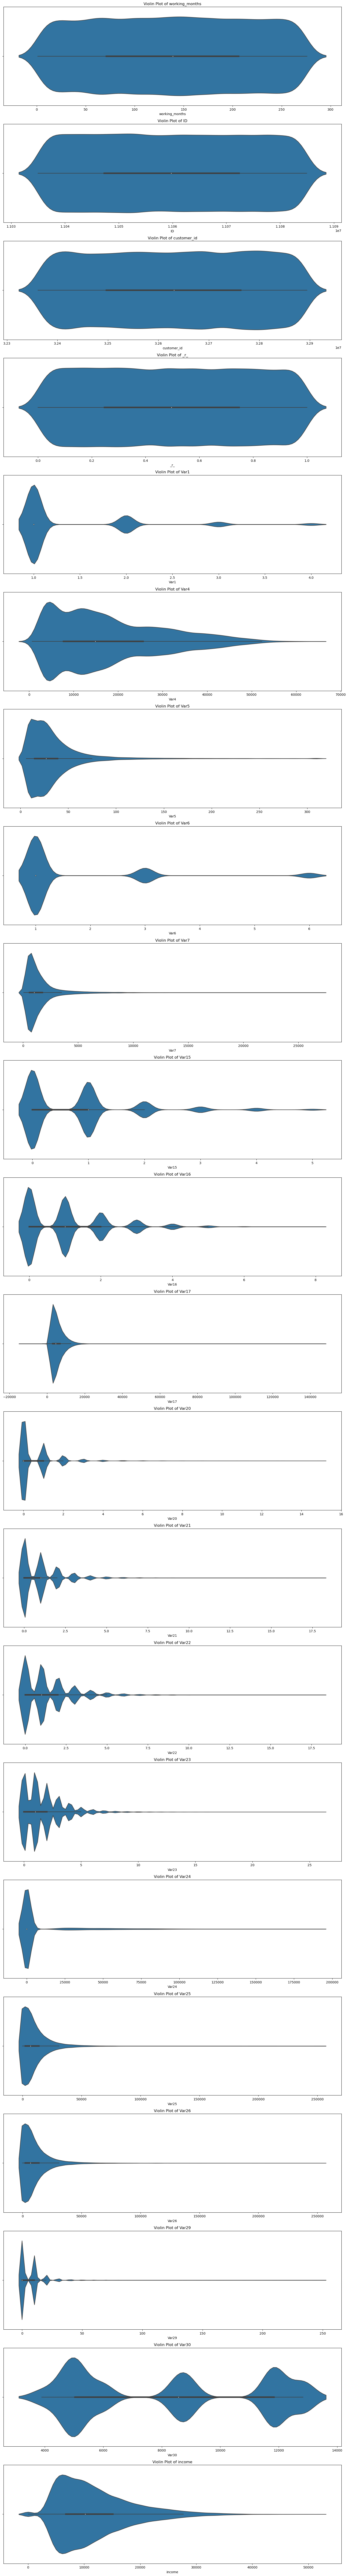

In [17]:
plt.figure(figsize=(15, 5 * len(num_vars)))

# Drawing violin plots for numerical variables
for i, var in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 1, i)
    sns.violinplot(x=df[var])
    plt.title(f'Violin Plot of {var}')

plt.tight_layout()
plt.show()

Creating QQ plots

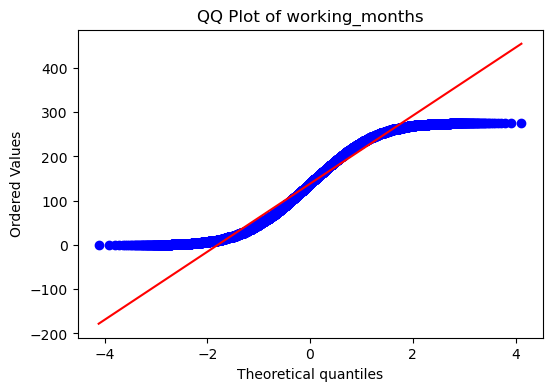

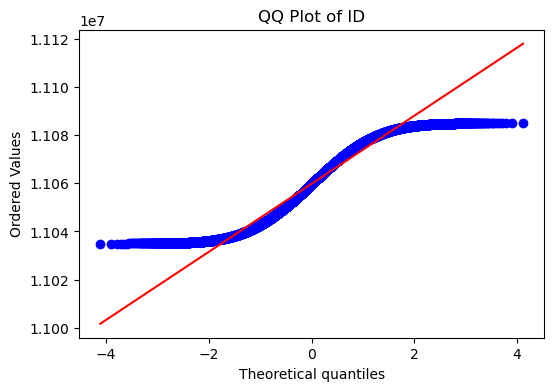

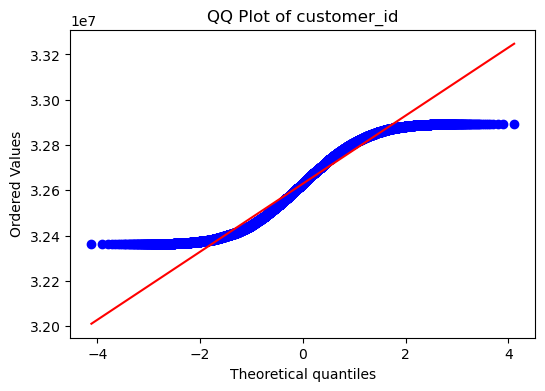

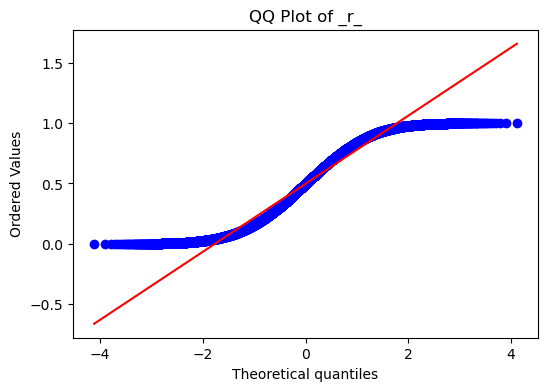

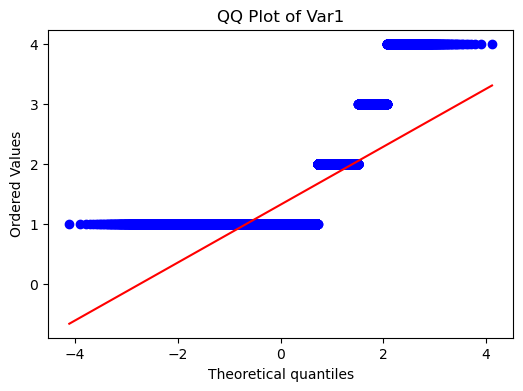

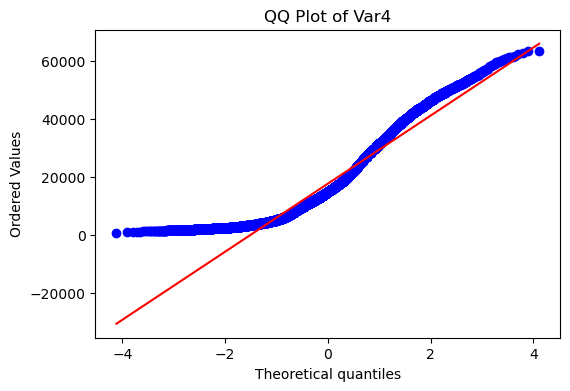

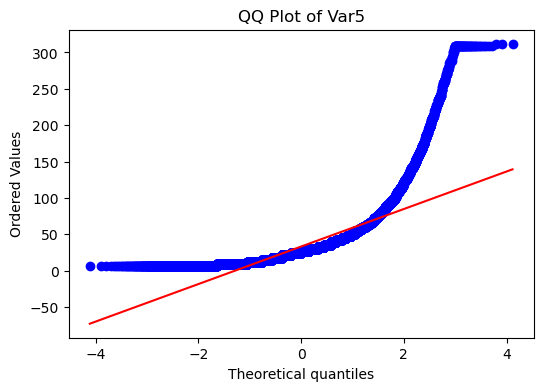

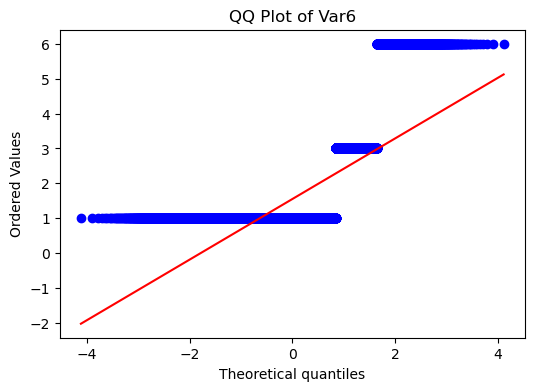

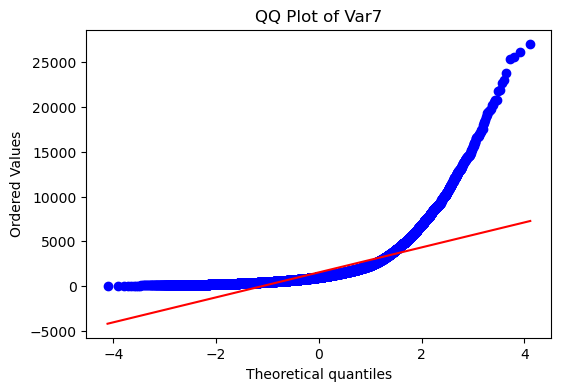

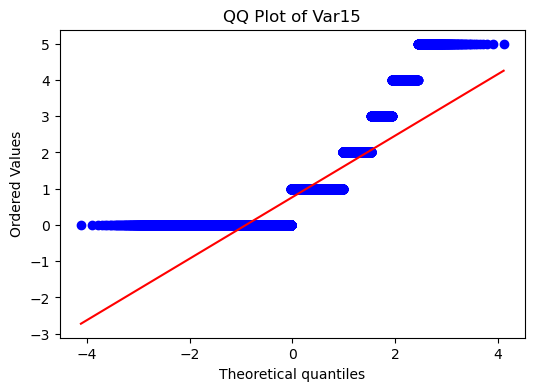

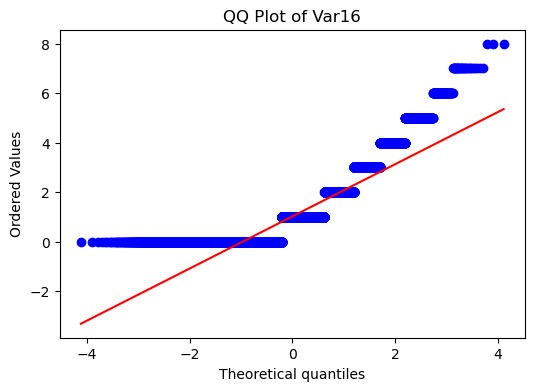

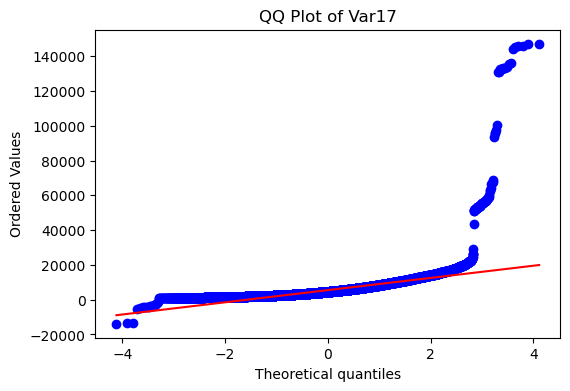

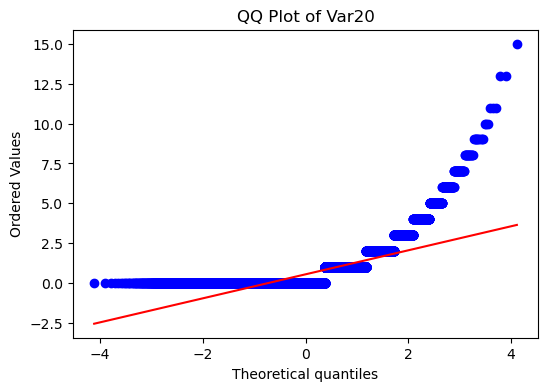

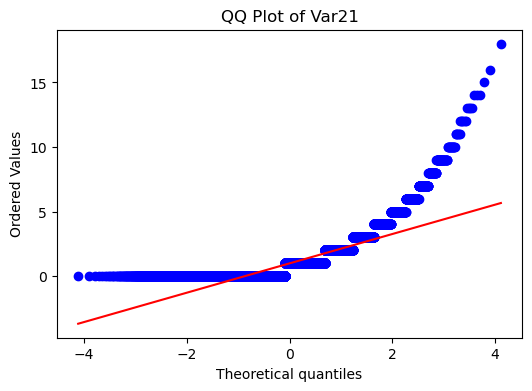

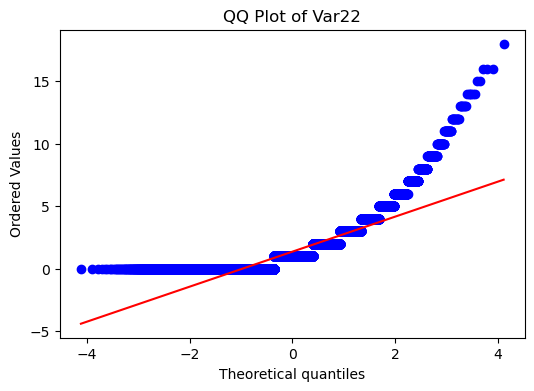

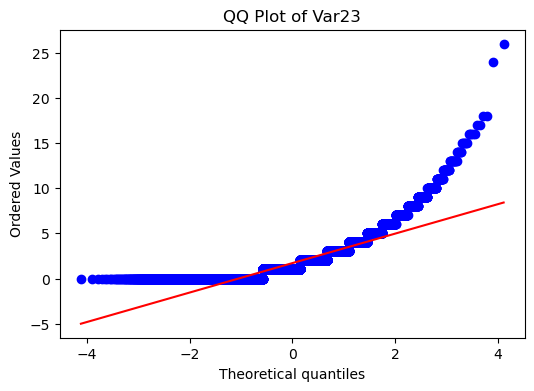

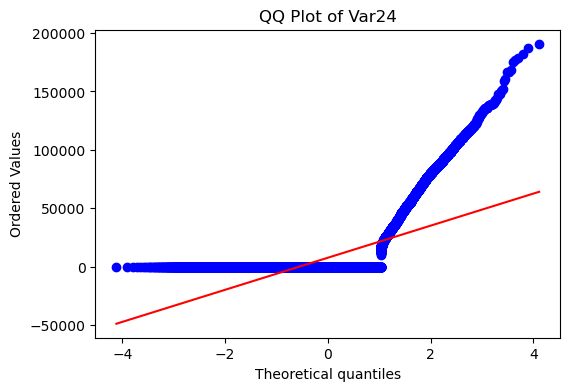

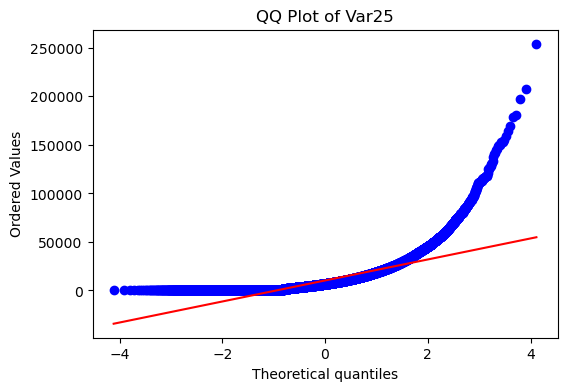

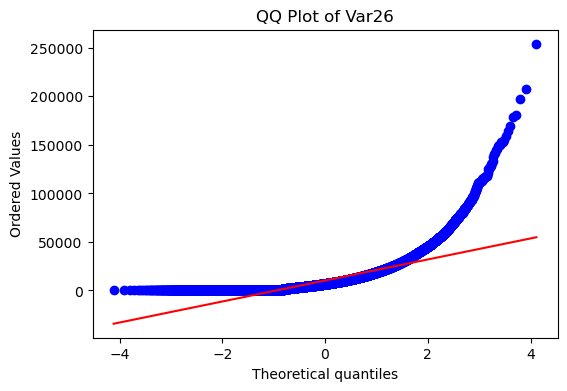

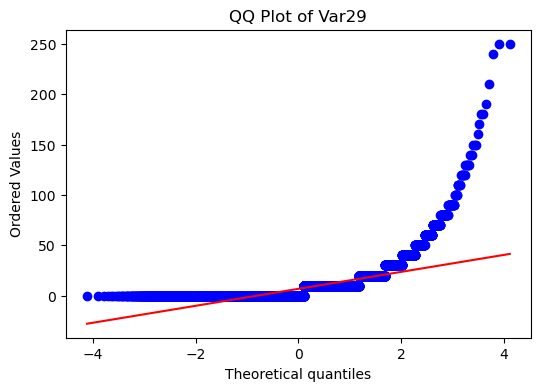

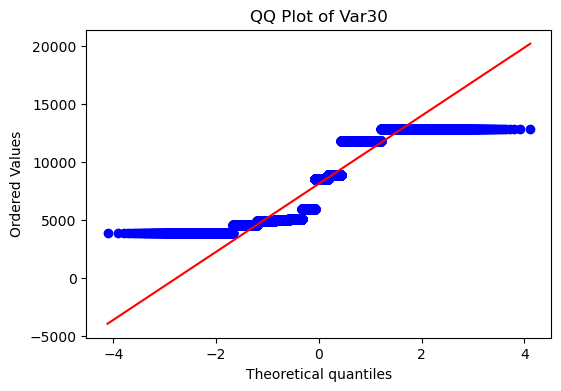

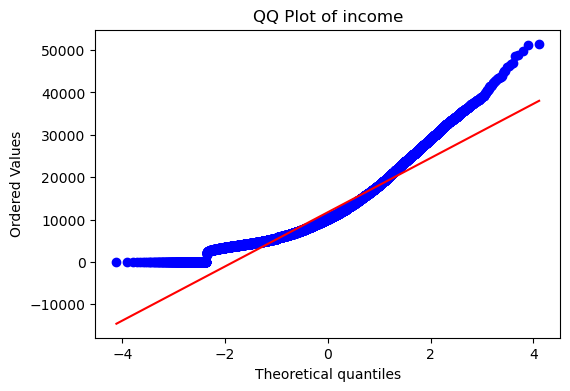

In [19]:
# Creating QQ plots for each numerical variable
for var in num_vars:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')
    plt.show()

Creating a heatmap for all variables in dataset 'df'

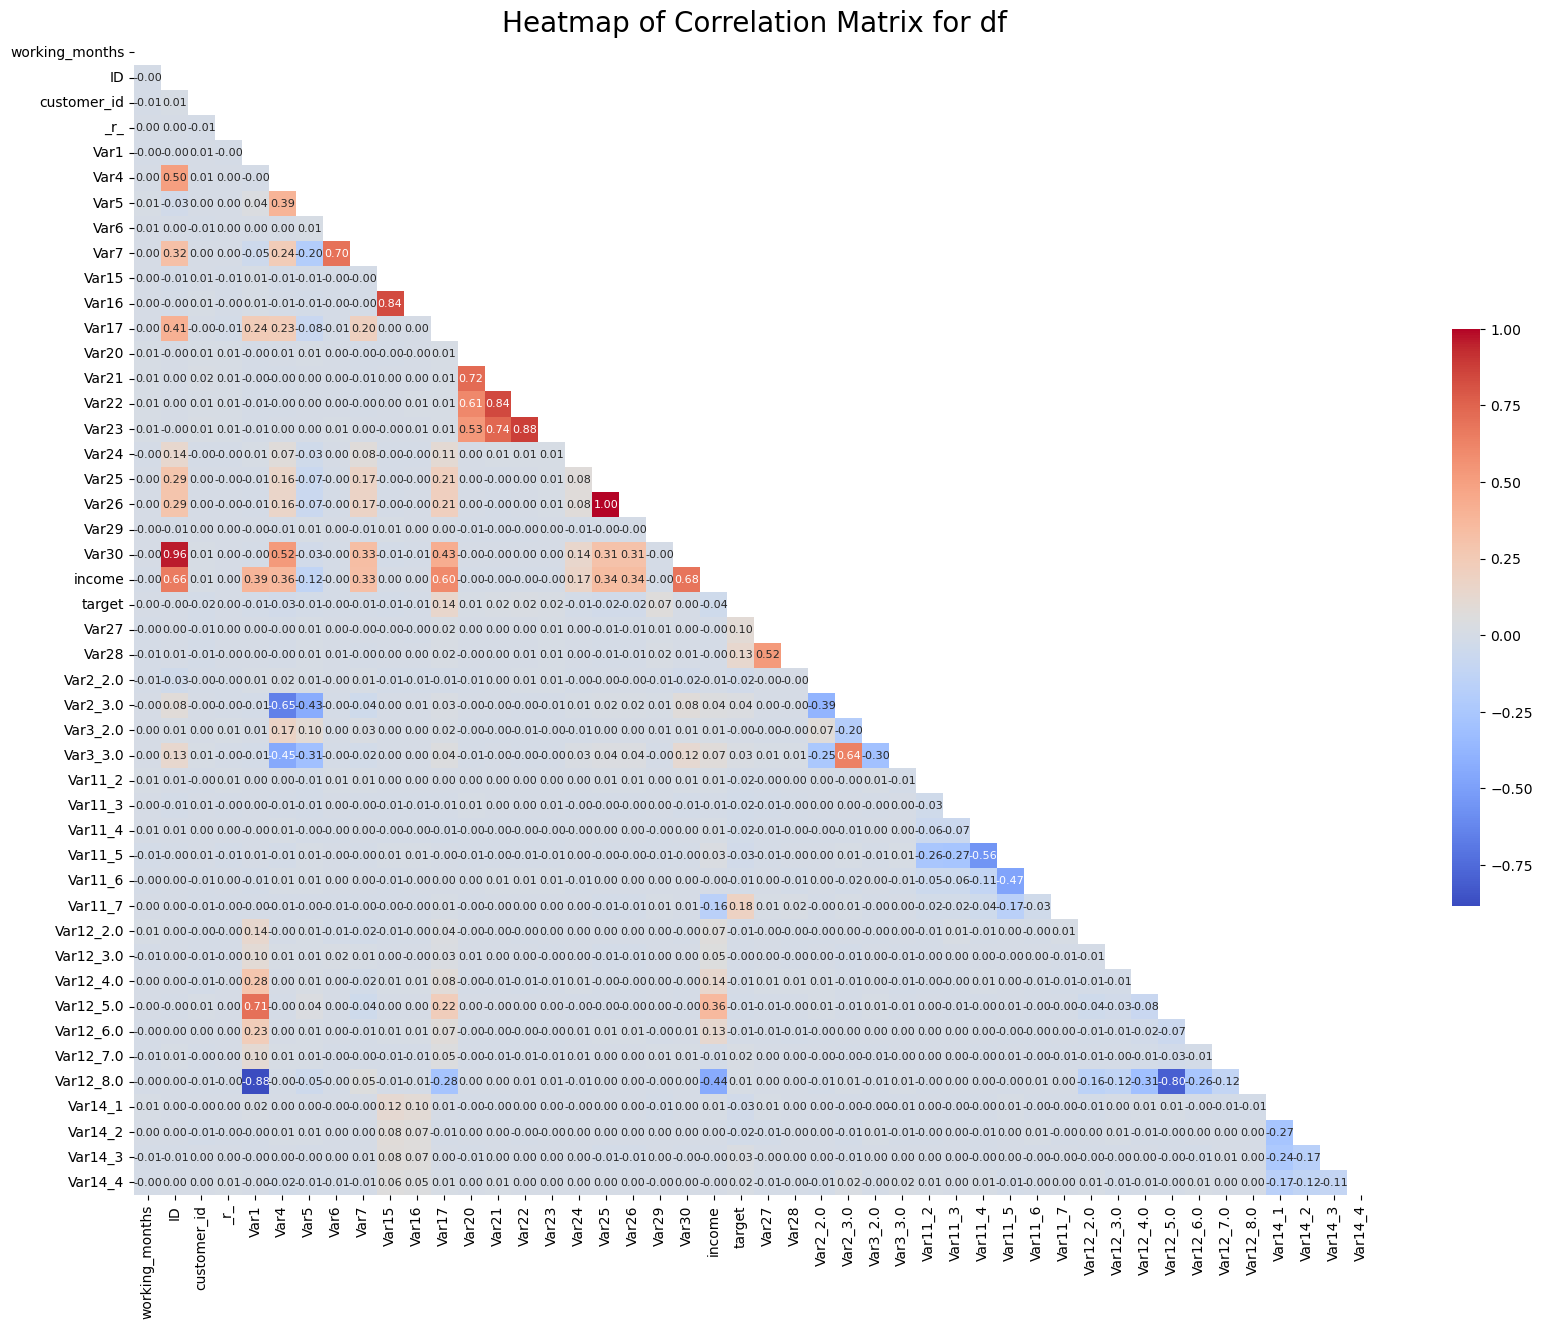

In [14]:
# Computing correlation measures for all variables
corr = df.corr()

# Setting canvas for plots 
plt.figure(figsize=(20, 15)) 

# Only triangular matrix 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Drawing a heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={'shrink': .5}, annot_kws={'size': 8})


plt.title('Heatmap of Correlation Matrix for df', fontsize=20)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Statistical Describe

In [21]:
# Podstawowe statystyki dla zmiennych numerycznych
basic_stats_num = df[num_vars].describe()

# Skośność i Kurtoza dla zmiennych numerycznych
skewness_num = df[num_vars].skew().rename('Skewness').to_frame().T
kurtosis_num = df[num_vars].kurtosis().rename('Kurtosis').to_frame().T

# Ilość wartości odstających dla zmiennych numerycznych
Q1_num = df[num_vars].quantile(0.25)
Q3_num = df[num_vars].quantile(0.75)
IQR_num = Q3_num - Q1_num
outliers_num = ((df[num_vars] < (Q1_num - 1.5 * IQR_num)) | (df[num_vars] > (Q3_num + 1.5 * IQR_num))).sum().rename('Outliers').to_frame().T

# Łączenie statystyk numerycznych
stats_summary_num = pd.concat([basic_stats_num, skewness_num, kurtosis_num, outliers_num])

# Podstawowe statystyki dla zmiennych binarnych
basic_stats_bin = df[bin_vars].describe()

# Poprawka w celu usunięcia 'NaN' z wyników dla zmiennych binarnych
# Nie ma potrzeby liczenia skośności, kurtozy i outlierów dla zmiennych binarnych, ponieważ ich natura jest inna niż zmiennych numerycznych

# Wyświetlanie statystyk
print("Statystyki dla zmiennych numerycznych:")
print(stats_summary_num)
print("\nStatystyki dla zmiennych binarnych:")
print(basic_stats_bin)

Statystyki dla zmiennych numerycznych:
          working_months            ID   customer_id           _r_  \
count       35700.000000  3.570000e+04  3.570000e+04  3.570000e+04   
mean          138.384594  1.105982e+07  3.262923e+07  4.981009e-01   
std            78.582653  1.446528e+04  1.537871e+05  2.886210e-01   
min             1.000000  1.103498e+07  3.236142e+07  3.953460e-07   
25%            71.000000  1.104728e+07  3.249697e+07  2.475815e-01   
50%           139.000000  1.105974e+07  3.263081e+07  4.961683e-01   
75%           206.000000  1.107237e+07  3.276317e+07  7.475544e-01   
max           276.000000  1.108498e+07  3.289438e+07  9.999984e-01   
Skewness       -0.005728  1.478145e-02 -1.658372e-02  1.534532e-02   
Kurtosis       -1.172129 -1.203989e+00 -1.200267e+00 -1.203006e+00   
Outliers        0.000000  0.000000e+00  0.000000e+00  0.000000e+00   

                  Var1          Var4          Var5          Var6  \
count     35700.000000  35700.000000  35700.000000  